In [1]:
from keras.models import Sequential
from keras.layers import Dense
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import seaborn as sns

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
df = pd.read_csv('/content/drive/MyDrive/features_30_sec.csv')

In [4]:
df

,filename,length,chroma_stft_mean,chroma_stft_var,rms_mean,rms_var,spectral_centroid_mean,spectral_centroid_var,spectral_bandwidth_mean,spectral_bandwidth_var,...,mfcc16_var,mfcc17_mean,mfcc17_var,mfcc18_mean,mfcc18_var,mfcc19_mean,mfcc19_var,mfcc20_mean,mfcc20_var,label
0,blues.00000.wav,661794,0.350088,0.088757,0.130228,0.002827,1784.165850,129774.064525,2002.449060,85882.761315,...,52.420910,-1.690215,36.524071,-0.408979,41.597103,-2.303523,55.062923,1.221291,46.936035,blues
1,blues.00001.wav,661794,0.340914,0.094980,0.095948,0.002373,1530.176679,375850.073649,2039.036516,213843.755497,...,55.356403,-0.731125,60.314529,0.295073,48.120598,-0.283518,51.106190,0.531217,45.786282,blues
2,blues.00002.wav,661794,0.363637,0.085275,0.175570,0.002746,1552.811865,156467.643368,1747.702312,76254.192257,...,40.598766,-7.729093,47.639427,-1.816407,52.382141,-3.439720,46.639660,-2.231258,30.573025,blues
3,blues.00003.wav,661794,0.404785,0.093999,0.141093,0.006346,1070.106615,184355.942417,1596.412872,166441.494769,...,44.427753,-3.319597,50.206673,0.636965,37.319130,-0.619121,37.259739,-3.407448,31.949339,blues
4,blues.00004.wav,661794,0.308526,0.087841,0.091529,0.002303,1835.004266,343399.939274,1748.172116,88445.209036,...,86.099236,-5.454034,75.269707,-0.916874,53.613918,-4.404827,62.910812,-11.703234,55.195160,blues
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,rock.00095.wav,661794,0.352063,0.080487,0.079486,0.000345,2008.149458,282174.689224,2106.541053,88609.749506,...,45.050526,-13.289984,41.754955,2.484145,36.778877,-6.713265,54.866825,-1.193787,49.950665,rock
996,rock.00096.wav,661794,0.398687,0.075086,0.076458,0.000588,2006.843354,182114.709510,2068.942009,82426.016726,...,33.851742,-10.848309,39.395096,1.881229,32.010040,-7.461491,39.196327,-2.795338,31.773624,rock
997,rock.00097.wav,661794,0.432142,0.075268,0.081651,0.000322,2077.526598,231657.968040,1927.293153,74717.124394,...,33.597008,-12.845291,36.367264,3.440978,36.001110,-12.588070,42.502201,-2.106337,29.865515,rock
998,rock.00098.wav,661794,0.362485,0.091506,0.083860,0.001211,1398.699344,240318.731073,1818.450280,109090.207161,...,46.324894,-4.416050,43.583942,1.556207,34.331261,-5.041897,47.227180,-3.590644,41.299088,rock


In [5]:
df = df.drop('filename', axis = 1)

In [6]:
xcols = list(df.columns.values)[:-1]
ycols = list(df.columns.values)[-1:]

<h1>Complete the Following:</h1>
<ol>
  <li>One hot encode the y column.</li>
    <ul>
      <li>You can use the variable <strong>ycols</strong> from above which is the name of the y variable.</li>
      <li>Remember that the Pandas function to one hot encode is <strong>get_dummies()</strong> as we have seen in <strong>Day 3 Notebook</strong>.</li>
    </ul>
  <li>Scale the x columns.</li>
    <ul>
      <li>You can use the variable <strong>xcols</strong> from above which is the list of x variables.</li>
      <li>Use the function <strong>MinMaxScaler()</strong> which we saw an example of how to use in <strong>Day 7 Notebook</strong>.</li>
    </ul>
  <li>Split data into training and testing.</li>
    <ul>
      <li>Use <strong>train_test_split()</strong> as we have in <strong>Day 3 Notebook</strong>.</li>
      <li>As a parameter of train_test_split, set <strong>shuffle = True</strong> to shuffle rows.</li>
    </ul>
  <li>Build a sequential model with dense layers using keras.</li>
    <ul>
      <li>You saw how to do this in <strong>Day 7 Notebook</strong>.</li>
      <li>You can try out any activation function you want. I recommend testing <strong>relu, sigmoid, or linear</strong>.</li>
      <li>Incorporate as many layers as you want with as many incoming and outgoing nodes.</li>
      <li>Hint: in the first layer make sure you set the input size to be the number of x columns which you can get with the code <strong>len(xcols)</strong>.</li>
    </ul>
  <li>Predict for training and testing data.</li>
    <ul>
      <li>The outputs would be the probability that each sample is a certain class. Develop a function to map the highest predicted probability for a sample to a class.</li>
      <li>Hint: check each predicted sample and save the index of the highest value as the predicted class.</li>
    </ul>
  <li>Generate a confusion matrix for both the training and testing predictions.</li>
    <ul>
      <li>Use the function <strong>confusion_matrix()</strong> which we did in <strong>Day 3 Notebook</strong>.</li>
    </ul>
<ol>

In [7]:
y_one_hot = pd.get_dummies(df.loc[:, ycols])

In [8]:
scaler = MinMaxScaler()
scaler.fit(df.loc[:, xcols])
x_normalized = scaler.transform(df.loc[:, xcols])

In [9]:
x_train, x_test, y_train, y_test = train_test_split(x_normalized, y_one_hot, shuffle=True, test_size=0.2)

In [10]:
model = Sequential()
model.add(Dense(128, input_shape = (len(xcols),), activation = 'relu'))
model.add(Dense(64, input_shape = (len(xcols),), activation = 'sigmoid'))
model.add(Dense(32, input_shape = (len(xcols),), activation = 'mish'))
model.add(Dense(10, activation = 'sigmoid'))
model.compile(optimizer = 'adam', loss = 'binary_crossentropy', )

In [11]:
model.fit(x_train, y_train, epochs = 500)

Epoch 1/500
25/25 [==============================] - 1s 2ms/step - loss: 0.4922
Epoch 2/500
25/25 [==============================] - 0s 2ms/step - loss: 0.3313
Epoch 3/500
25/25 [==============================] - 0s 2ms/step - loss: 0.3232
Epoch 4/500
25/25 [==============================] - 0s 2ms/step - loss: 0.3202
Epoch 5/500
25/25 [==============================] - 0s 2ms/step - loss: 0.3152
Epoch 6/500
25/25 [==============================] - 0s 2ms/step - loss: 0.3080
Epoch 7/500
25/25 [==============================] - 0s 2ms/step - loss: 0.2976
Epoch 8/500
25/25 [==============================] - 0s 2ms/step - loss: 0.2865
Epoch 9/500
25/25 [==============================] - 0s 2ms/step - loss: 0.2753
Epoch 10/500
25/25 [==============================] - 0s 2ms/step - loss: 0.2675
Epoch 11/500
25/25 [==============================] - 0s 2ms/step - loss: 0.2613
Epoch 12/500
25/25 [==============================] - 0s 3ms/step - loss: 0.2543
Epoch 13/500
25/25 [=================

In [12]:
model.evaluate(x_test, y_test)

7/7 [==============================] - 0s 2ms/step - loss: 0.2617


0.26172804832458496

In [13]:
y_train_prob = model.predict(x_train)
y_test_prob = model.predict(x_test)

7/7 [==============================] - 0s 2ms/step


In [14]:
def getClassLabels(y_prob):
  classLabels = []
  for i in y_prob:
    classLabels.append(np.argmax(i))
  return classLabels

<Axes: >

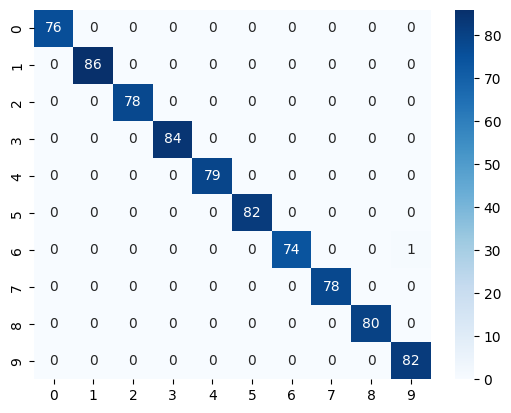

In [15]:
y_train_pred = getClassLabels(y_train_prob)
y_train_true = getClassLabels(np.array(y_train))
cmat_train = confusion_matrix(y_train_true, y_train_pred)
sns.heatmap(cmat_train, annot=True, cmap='Blues')

<Axes: >

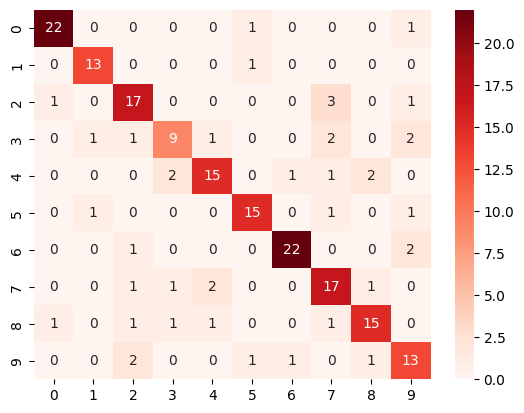

In [16]:
y_test_pred = getClassLabels(y_test_prob)
y_test_true = getClassLabels(np.array(y_test))
cmat_test = confusion_matrix(y_test_true, y_test_pred)
sns.heatmap(cmat_test, annot=True, cmap='Reds')

In [17]:
count_train = 0
for i in range(len(cmat_train)):
  count_train += cmat_train[i][i]
print(count_train/len(x_train))

0.99875


In [18]:
count_test = 0
for i in range(len(cmat_test)):
  count_test += cmat_test[i][i]
print(count_test/len(x_test))

0.79
